<a href="https://colab.research.google.com/github/Abinav160701/ML_Projects/blob/master/Hand_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image    ## to display images
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler ## for scaling the input data
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_digits       ## mnist data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
digits = load_digits()

In [ ]:
data = digits.images   ## features from digits
target = digits.target ## labels from digits

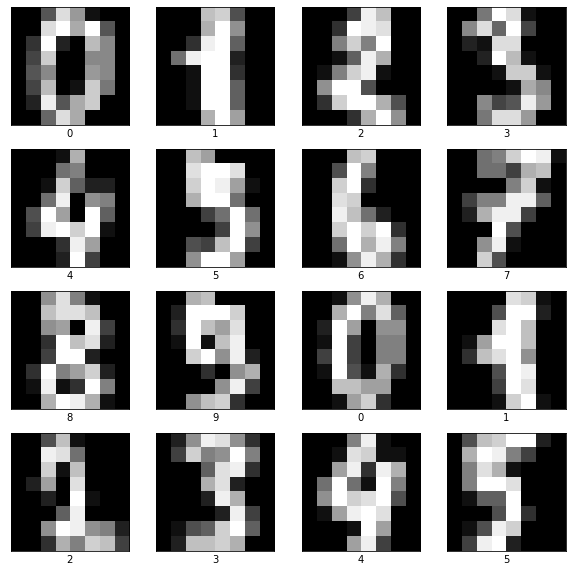

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[i], cmap='gray')
    plt.xlabel(target[i])
plt.show()

In [ ]:
print("Data shape is: ", data.shape)
print("Target shape is: ", target.shape)

Data shape is:  (1797, 8, 8)
Target shape is:  (1797,)


In [ ]:
data = data.reshape((1797, 64, ))

In [ ]:
min_max_sc = MinMaxScaler()
X = min_max_sc.fit_transform(data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25, random_state=42)

In [ ]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1347, 64)
X_test shape:  (450, 64)
y_train shape:  (1347,)
y_test shape:  (450,)


In [ ]:
## logistic Regression
lg = LogisticRegression()

## training
lg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:

pred = lg.predict(X_test)

---------------------------------------------CLassification Report----------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        37
           2       0.97      1.00      0.99        38
           3       1.00      0.93      0.97        46
           4       1.00      0.98      0.99        55
           5       0.93      0.95      0.94        59
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        41
           8       0.93      0.97      0.95        38
           9       0.94      0.96      0.95        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

-------------------------------------------Accuracy Score -------------------------------------------------------
0.971111111111

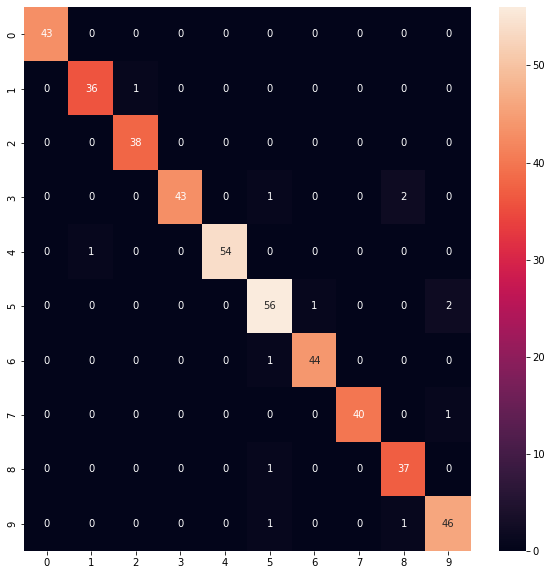

In [ ]:
print("---------------------------------------------CLassification Report----------------------------------------------")
print(classification_report(y_test, pred))

print("-------------------------------------------Accuracy Score -------------------------------------------------------")
print(accuracy_score(y_test, pred))

print("-----------------------------------------------Confusion Matrix -----------------------------------------------")
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

array([0, 1, 2, ..., 8, 9, 8])